<a href="https://colab.research.google.com/github/abhi147p/Abhishek_INFO5731_Spring2023/blob/main/In_class_exercise_04_03282023_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The fourth in-class-exercise (40 points in total, 03/28/2022)**

Question description: Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks:

## (1) (10 points) Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [1]:
# Write your code here

# Write your code here

# getting the data
# You code here (Please add comments in the code):

import requests
from bs4 import BeautifulSoup
import re
import time
import pandas as pd

def get_soup(url):
    """
        params1: url (contains the url of google scholar page)
        return: soup (fetching the url page data and then further converted to html parser)
    """
  # headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'}
    headers = {'User-Agent': ('Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Safari/537.36')}
               # 'X-User-Agent': ('Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Safari/537.36 FKUA/website/42/website/Desktop')}
    try:
        # requesting for data using requests with url and headers for authentication
        data = requests.get(url, headers=headers)
        # print(f"Extracted the data with response as {data.status_code}")
        if data.status_code != 200:
            raise Exception(f"Failed to fetch data: {data.status_code} and text as {data.text}")
    except Exception as ex:
        print(f"Exception occurred as {ex}")
        return None
    soup = BeautifulSoup(data.text, "html.parser")
    return soup

def fetch_data_web(pages):

  final_data = []
  for i in range(1, pages+1):
    url = f"https://www.flipkart.com/search?q=Watches&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page={i}"
    soup = get_soup(url)
    # print(soup.prettify())
    products_data = soup.findAll("div", attrs={"class": "_1AtVbE col-12-12"})
    for prod_data in products_data:
      sub_prod_data = prod_data.findAll("div", attrs={"class": "_1xHGtK _373qXS"})
      for data in sub_prod_data:
        prod_url = "https://www.flipkart.com" + data.find("a", attrs={"class": "_2UzuFa"}).get("href")
        brand = data.find("div", attrs={"class": "_2WkVRV"}).text.strip()
        title = data.find("a", attrs={"class": "IRpwTa"}).get("title")
        new_price = data.find("div", attrs={"class": "_30jeq3"})
        old_price = data.find("div", attrs={"class": "_3I9_wc"})
        if new_price:
          new_price = new_price.text.strip()
        else:
          new_price = "No"
        if old_price:
          old_price = old_price.text.strip()
        else:
          old_price = "No"
        # discount = data.find("div", attrs={"class": "_3Ay6Sb"}).text.strip()
        # free_delivery = data.find("div", attrs={"class": "_2Tpdn3"})
        # if free_delivery:
        #   free_delivery = free_delivery.text.strip()
        # else:
        #   free_delivery = "No free Delivery"
        soup_data = get_soup(prod_url)
        # print(prod_url)
        # print(soup_data)
        # break
        # rating = "0"
        # if soup_data:
        if soup_data:
          rating = soup_data.find("div", attrs={"class": "_3LWZlK _3uSWvT"})
          if rating:
            rating = rating.text
          else:
            rating = "No rating found"
          reviews = soup_data.findAll("div", attrs={"class": "_6K-7Co"})
          for x in reviews:
            final_data.append([title, prod_url, brand, new_price, old_price, rating, x.text])
        else:
          rating = "No rating reviews found"
        # final_data.append([title, prod_url, brand, new_price, old_price, rating, review])
      time.sleep(1)
    print(f"Processed {i} pages")
  
  df = pd.DataFrame(final_data, columns=["Title", "url", "brand", "new_price", "old_price", "rating", "review"])
  return df

df = fetch_data_web(int(input("Enter no of pages: ")))
df.head()



Enter no of pages: 3
Processed 1 pages
Processed 2 pages
Processed 3 pages


,Title,url,brand,new_price,old_price,rating,review
0,Luxurious APL Fashion Silicone Black Colored L...,https://www.flipkart.com/timemore-luxurious-ap...,TIMEMORE,₹206,"₹1,099",4,This product is value for money. Very nice thi...
1,Luxurious APL Fashion Silicone Black Colored L...,https://www.flipkart.com/timemore-luxurious-ap...,TIMEMORE,₹206,"₹1,099",4,Very nice look thank you flipkart
2,Luxurious APL Fashion Silicone Black Colored L...,https://www.flipkart.com/timemore-luxurious-ap...,TIMEMORE,₹206,"₹1,099",4,Super brand
3,Lorenz Black Dial Analog Watch Analog Watch -...,https://www.flipkart.com/lorenz-mk-3080k-black...,LORENZ,₹449,"₹1,499",3.8,Excellent watch with beautiful colour.Goes wit...
4,Lorenz Black Dial Analog Watch Analog Watch -...,https://www.flipkart.com/lorenz-mk-3080k-black...,LORENZ,₹449,"₹1,499",3.8,"I liked the product so much, and it was so ama..."


In [2]:
df = df[df['old_price'] != "No"]

In [3]:
# converting str to numeric

df['new_price'] = df['new_price'].str.replace(',', '').str[1:]
df['old_price'] = df['old_price'].str.replace(',', '').str[1:]

In [4]:
df['new_price'] = df['new_price'].astype(int)
df['old_price'] = df['old_price'].astype(int)
df['rating'] = df['rating'].astype(float)

df.head()

,Title,url,brand,new_price,old_price,rating,review
0,Luxurious APL Fashion Silicone Black Colored L...,https://www.flipkart.com/timemore-luxurious-ap...,TIMEMORE,206,1099,4.0,This product is value for money. Very nice thi...
1,Luxurious APL Fashion Silicone Black Colored L...,https://www.flipkart.com/timemore-luxurious-ap...,TIMEMORE,206,1099,4.0,Very nice look thank you flipkart
2,Luxurious APL Fashion Silicone Black Colored L...,https://www.flipkart.com/timemore-luxurious-ap...,TIMEMORE,206,1099,4.0,Super brand
3,Lorenz Black Dial Analog Watch Analog Watch -...,https://www.flipkart.com/lorenz-mk-3080k-black...,LORENZ,449,1499,3.8,Excellent watch with beautiful colour.Goes wit...
4,Lorenz Black Dial Analog Watch Analog Watch -...,https://www.flipkart.com/lorenz-mk-3080k-black...,LORENZ,449,1499,3.8,"I liked the product so much, and it was so ama..."


In [5]:
df = df[['Title', 'url', 'review']]
df.head()

,Title,url,review
0,Luxurious APL Fashion Silicone Black Colored L...,https://www.flipkart.com/timemore-luxurious-ap...,This product is value for money. Very nice thi...
1,Luxurious APL Fashion Silicone Black Colored L...,https://www.flipkart.com/timemore-luxurious-ap...,Very nice look thank you flipkart
2,Luxurious APL Fashion Silicone Black Colored L...,https://www.flipkart.com/timemore-luxurious-ap...,Super brand
3,Lorenz Black Dial Analog Watch Analog Watch -...,https://www.flipkart.com/lorenz-mk-3080k-black...,Excellent watch with beautiful colour.Goes wit...
4,Lorenz Black Dial Analog Watch Analog Watch -...,https://www.flipkart.com/lorenz-mk-3080k-black...,"I liked the product so much, and it was so ama..."


In [6]:
df['review'].isna().sum()

0

In [7]:
import nltk, re, string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from textblob import Word
nltk.download('stopwords')
nltk.download("wordnet")
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [8]:
import re

df['clean_Data'] = df['review'].map(lambda x: re.sub('[,\.!?]', '', x))
df['clean_Data'] = df['clean_Data'].map(lambda x: x.lower())
df.head()

,Title,url,review,clean_Data
0,Luxurious APL Fashion Silicone Black Colored L...,https://www.flipkart.com/timemore-luxurious-ap...,This product is value for money. Very nice thi...,this product is value for money very nice this...
1,Luxurious APL Fashion Silicone Black Colored L...,https://www.flipkart.com/timemore-luxurious-ap...,Very nice look thank you flipkart,very nice look thank you flipkart
2,Luxurious APL Fashion Silicone Black Colored L...,https://www.flipkart.com/timemore-luxurious-ap...,Super brand,super brand
3,Lorenz Black Dial Analog Watch Analog Watch -...,https://www.flipkart.com/lorenz-mk-3080k-black...,Excellent watch with beautiful colour.Goes wit...,excellent watch with beautiful colourgoes with...
4,Lorenz Black Dial Analog Watch Analog Watch -...,https://www.flipkart.com/lorenz-mk-3080k-black...,"I liked the product so much, and it was so ama...",i liked the product so much and it was so amaz...


In [9]:
# pip install pyLDAvis

In [10]:
# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [11]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

review_data = df['review'].values.tolist()
review_data_words = list(sent_to_words(review_data))
# remove stop words
review_data_words = remove_stopwords(review_data_words)
print(review_data_words[:1])

[['product', 'value', 'money', 'nice', 'product', 'bill', 'qualities', 'diesel', 'looking', 'nice']]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:
review_data_words

[['product',
  'value',
  'money',
  'nice',
  'product',
  'bill',
  'qualities',
  'diesel',
  'looking',
  'nice'],
 ['nice', 'look', 'thank', 'flipkart'],
 ['super', 'brand'],
 ['excellent',
  'watch',
  'beautiful',
  'colour',
  'goes',
  'every',
  'occation',
  'sure',
  'lasting',
  'colour',
  'dials',
  'never',
  'work',
  'showor',
  'else',
  'nice'],
 ['liked', 'product', 'much', 'amazing', 'really', 'worth', 'enough', 'price'],
 ['good', 'watch', 'boys'],
 ['nice',
  'product',
  'really',
  'liked',
  'must',
  'buy',
  'product',
  'searching',
  'wrist',
  'watch',
  'worth'],
 ['really', 'love', 'thank', 'much', 'flipkart'],
 ['good'],
 ['nice',
  'absolutely',
  'right',
  'price',
  'good',
  'design',
  'watch',
  'beautiful',
  'colors',
  'value',
  'money',
  'west',
  'money',
  'thank',
  'flipkart',
  'delevery',
  'verry',
  'fast',
  'quality',
  'best'],
 ['nice',
  'product',
  'like',
  'much',
  'money',
  'charged',
  'nice',
  'forks',
  'golden',
 

In [12]:
bigram = gensim.models.Phrases(review_data_words, min_count=5, threshold=100)
trigram = gensim.models.Phrases(bigram[review_data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

review_data_words_bigrams = make_bigrams(review_data_words)

# Do lemmatization keeping only noun, adj, vb, adv
review_data_lemmatized = lemmatization(review_data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(review_data_lemmatized[:1])

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


[['product', 'value', 'money', 'nice', 'product', 'bill', 'quality', 'diesel', 'look', 'nice']]


In [43]:
review_data_lemmatized

[['product',
  'value',
  'money',
  'nice',
  'product',
  'bill',
  'quality',
  'diesel',
  'look',
  'nice'],
 ['nice', 'look', 'thank', 'flipkart'],
 ['super', 'brand'],
 ['excellent',
  'watch',
  'beautiful',
  'colour',
  'go',
  'occation',
  'sure',
  'last',
  'colour',
  'dial',
  'never',
  'work',
  'showor',
  'else',
  'nice'],
 ['like', 'product', 'much', 'amazing', 'really', 'worth', 'enough', 'price'],
 ['good', 'watch', 'boy'],
 ['nice',
  'product',
  'really',
  'like',
  'buy',
  'product',
  'search',
  'wrist',
  'watch',
  'worth'],
 ['really', 'love', 'thank', 'much', 'flipkart'],
 ['good'],
 ['nice',
  'absolutely',
  'right',
  'price',
  'good',
  'design',
  'watch',
  'beautiful',
  'color',
  'value',
  'money',
  'money',
  'thank',
  'flipkart',
  'delevery',
  'verry',
  'fast',
  'quality',
  'good'],
 ['nice',
  'product',
  'much',
  'money',
  'charge',
  'nice',
  'fork',
  'golden',
  'wish',
  'different'],
 ['nice',
  'stap',
  'good',
  'rub

In [13]:
review_id2word = corpora.Dictionary(review_data_lemmatized) # corpus dictionary
review_texts = review_data_lemmatized
review_corpus = [review_id2word.doc2bow(text) for text in review_texts] # doc term matrix
print(review_corpus[:1])
[[(review_id2word[i], f) for i, f in c] for c in review_corpus[:1]]

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 2), (5, 2), (6, 1), (7, 1)]]


[[('bill', 1),
  ('diesel', 1),
  ('look', 1),
  ('money', 1),
  ('nice', 2),
  ('product', 2),
  ('quality', 1),
  ('value', 1)]]

In [45]:
review_id2word[0]

'bill'

<b> LDA </b>

In [15]:
# Sample model for lda generating total of 20 topics
from pprint import pprint
lda_model = gensim.models.ldamodel.LdaModel(corpus=review_corpus,
                                           id2word=review_id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
pprint(lda_model.print_topics())
doc_lda = lda_model[review_corpus]

[(0,
  '0.332*"buy" + 0.058*"timer" + 0.058*"alarm" + 0.001*"bad" + 0.001*"item" + '
  '0.001*"band" + 0.001*"stylish" + 0.001*"make" + 0.001*"save" + '
  '0.001*"plastic"'),
 (1,
  '0.234*"happy" + 0.180*"well" + 0.084*"wise" + 0.081*"delivery" + '
  '0.080*"fast" + 0.020*"beautiful" + 0.016*"pretty" + 0.004*"look" + '
  '0.004*"watch" + 0.003*"much"'),
 (2,
  '0.234*"good" + 0.227*"price" + 0.101*"quality" + 0.068*"nice" + '
  '0.042*"rubber" + 0.033*"build" + 0.026*"product" + 0.021*"valuable" + '
  '0.018*"money" + 0.015*"stap"'),
 (3,
  '0.370*"watch" + 0.073*"good" + 0.044*"design" + 0.035*"fantastic" + '
  '0.033*"quality" + 0.028*"suitable" + 0.027*"recommend" + 0.026*"beautiful" '
  '+ 0.024*"colour" + 0.023*"look"'),
 (4,
  '0.129*"watch" + 0.113*"love" + 0.105*"cool" + 0.101*"pretty" + 0.071*"go" + '
  '0.054*"receive" + 0.042*"gift" + 0.031*"guy" + 0.029*"rate" + '
  '0.029*"packaging"'),
 (5,
  '0.147*"watch" + 0.129*"look" + 0.085*"nice" + 0.050*"buy" + 0.047*"product" '


In [16]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=review_data_lemmatized, dictionary=review_id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.4105615751771593


In [17]:
# import pyLDAvis
# import pyLDAvis.gensim  # don't skip this
# import matplotlib.pyplot as plt
# %matplotlib inline
# pyLDAvis.enable_notebook()
# vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
# vis

In [18]:
# calculating model coherence value for various number of topics to get the best k number
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values
start, limit, step=2, 20, 2
model_list, coherence_values = compute_coherence_values(dictionary=review_id2word, corpus=review_corpus, texts=review_data_lemmatized, start=start, limit=limit, step=step)
coherence_values_all = []
for m, cv in zip(range(start, limit, step), coherence_values):
    coherence_values_all.append(round(cv,4))
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.4261
Num Topics = 4  has Coherence Value of 0.3659
Num Topics = 6  has Coherence Value of 0.4061
Num Topics = 8  has Coherence Value of 0.442
Num Topics = 10  has Coherence Value of 0.4883
Num Topics = 12  has Coherence Value of 0.3569
Num Topics = 14  has Coherence Value of 0.4071
Num Topics = 16  has Coherence Value of 0.3635
Num Topics = 18  has Coherence Value of 0.365


In [19]:
sum(coherence_values_all)/len(coherence_values_all)

0.4023222222222223

As we can see the values are first decreased and then increasing. Hence taking the value, which is near to mean of all coherence values. Taking 6 topics with value 0.40.

In [20]:
optimal_model = model_list[2] # getting the topics=6 model, which is in 2nd index of our model and getting the 6 topics.
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.055*"time" + 0.040*"look" + 0.027*"buy" + 0.024*"day" + 0.022*"classy" + '
  '0.021*"show" + 0.020*"wear" + 0.018*"real" + 0.018*"hour" + 0.017*"go"'),
 (1,
  '0.083*"much" + 0.057*"watch" + 0.035*"keep" + 0.034*"fantastic" + '
  '0.029*"gifted" + 0.027*"lot" + 0.023*"wise" + 0.018*"well" + 0.017*"flip" + '
  '0.016*"perfect"'),
 (2,
  '0.040*"quality" + 0.038*"strap" + 0.035*"watch" + 0.027*"look" + '
  '0.027*"good" + 0.023*"big" + 0.020*"worth" + 0.019*"expect" + '
  '0.019*"excellent" + 0.018*"build"'),
 (3,
  '0.111*"good" + 0.109*"watch" + 0.094*"nice" + 0.075*"product" + '
  '0.042*"look" + 0.040*"thank" + 0.038*"love" + 0.035*"quality" + '
  '0.034*"flipkart" + 0.031*"really"'),
 (4,
  '0.045*"great" + 0.045*"love" + 0.031*"go" + 0.029*"gift" + 0.029*"stylish" '
  '+ 0.028*"pretty" + 0.028*"cool" + 0.026*"belt" + 0.022*"product" + '
  '0.021*"amazing"'),
 (5,
  '0.162*"product" + 0.108*"money" + 0.096*"nice" + 0.074*"value" + '
  '0.030*"worth" + 0.026*"buy" + 0.023*"

## (2) (10 points) Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [21]:
# Write your code here

# Write your code here

from gensim.models import LsiModel

lsamodel = LsiModel(review_corpus, num_topics=10, id2word = review_id2word)  # train model
print(lsamodel.print_topics(num_topics=10, num_words=10))

[(0, '0.578*"watch" + 0.364*"product" + 0.361*"nice" + 0.360*"good" + 0.251*"look" + 0.196*"quality" + 0.136*"thank" + 0.135*"flipkart" + 0.105*"love" + 0.095*"money"'), (1, '0.670*"watch" + -0.604*"product" + -0.278*"good" + -0.124*"nice" + -0.095*"money" + -0.067*"love" + 0.066*"look" + -0.065*"really" + -0.058*"thank" + -0.054*"flipkart"'), (2, '0.711*"good" + -0.480*"product" + 0.278*"quality" + -0.200*"nice" + -0.150*"watch" + 0.106*"money" + 0.097*"fast" + 0.093*"price" + 0.074*"design" + -0.070*"give"'), (3, '-0.832*"nice" + 0.291*"product" + 0.136*"watch" + 0.124*"go" + 0.117*"love" + -0.102*"quality" + 0.099*"give" + 0.094*"good" + 0.084*"amazing" + 0.080*"time"'), (4, '-0.690*"look" + 0.255*"watch" + 0.228*"good" + -0.154*"worth" + -0.145*"clear" + -0.137*"wear" + -0.123*"quality" + 0.118*"flipkart" + -0.112*"buy" + -0.110*"belt"'), (5, '0.504*"thank" + 0.392*"flipkart" + 0.298*"love" + 0.285*"really" + -0.253*"product" + -0.179*"money" + 0.162*"fast" + -0.140*"quality" + 0.1

In [22]:
coherencemodel = CoherenceModel(model=lsamodel, texts=review_data_lemmatized, dictionary=review_id2word, coherence='c_v')
print(coherencemodel.get_coherence())

0.3539981851335198


In [23]:
def compute_lsa_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        lsamodel = LsiModel(corpus, num_topics=num_topics, id2word = dictionary)  # train model
        model_list.append(lsamodel)
        coherencemodel = CoherenceModel(model=lsamodel, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

start, limit, step=2, 20, 2
model_lsa_list, coherence_values = compute_lsa_coherence_values(dictionary=review_id2word, corpus=review_corpus, texts=review_data_lemmatized, start=start, limit=limit, step=step)
coherence_values_all = []
for m, cv in zip(range(start, limit, step), coherence_values):
    coherence_values_all.append(round(cv,4))
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.4101
Num Topics = 4  has Coherence Value of 0.3722
Num Topics = 6  has Coherence Value of 0.4194
Num Topics = 8  has Coherence Value of 0.3979
Num Topics = 10  has Coherence Value of 0.3394
Num Topics = 12  has Coherence Value of 0.3573
Num Topics = 14  has Coherence Value of 0.3882
Num Topics = 16  has Coherence Value of 0.365
Num Topics = 18  has Coherence Value of 0.3721


In [24]:
coherence_values_all

[0.4101, 0.3722, 0.4194, 0.3979, 0.3394, 0.3573, 0.3882, 0.365, 0.3721]

In [25]:
sum(coherence_values_all)/len(coherence_values_all)

0.3801777777777778

As we can see the values are first decreased and then increasing, which is in unorganised way. Hence taking the value, which is near to mean of all coherence values. Taking 14 topics with value 0.38. 

In [26]:
optimal_model = model_list[6] # getting the topics=14 model, which is in 6th index of our model and getting the 14 topics.
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.002*"lovely" + 0.002*"avarage" + 0.002*"function" + 0.002*"long" + '
  '0.002*"mind" + 0.002*"bad" + 0.002*"wai" + 0.002*"item" + '
  '0.002*"excellenti" + 0.002*"take"'),
 (1,
  '0.091*"worth" + 0.086*"overall" + 0.077*"fantastic" + 0.066*"gifted" + '
  '0.056*"look" + 0.051*"wise" + 0.037*"good" + 0.024*"feature" + 0.022*"well" '
  '+ 0.021*"rate"'),
 (2,
  '0.480*"good" + 0.116*"quality" + 0.092*"awesome" + 0.027*"worthy" + '
  '0.021*"rubber" + 0.020*"build" + 0.014*"𝚕𝚘𝚘𝚔ke" + 0.014*"classic" + '
  '0.013*"money" + 0.011*"valuable"'),
 (3,
  '0.191*"watch" + 0.071*"good" + 0.060*"nice" + 0.053*"look" + '
  '0.034*"flipkart" + 0.028*"thank" + 0.024*"design" + 0.022*"delivery" + '
  '0.021*"fast" + 0.020*"hand"'),
 (4,
  '0.140*"pretty" + 0.082*"definitely" + 0.038*"product" + 0.036*"packaging" + '
  '0.034*"purchase" + 0.033*"cool" + 0.032*"short" + 0.028*"simple" + '
  '0.023*"screen" + 0.022*"sturdy"'),
 (5,
  '0.266*"product" + 0.261*"nice" + 0.077*"money" + 0.058*"look

## (3) (10 points) Generate K topics by using  lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

In [49]:
# Write your code here

!pip install lda2vec

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for lda2vec: filename=lda2vec-0.16.10-py3-none-any.whl size=14432 sha256=86e565ca6a7f921cf74fe72320cfe74e44ef0d5c990c9e20214f8660b92c49c0
  Stored in directory: /root/.cache/pip/wheels/fa/ad/6c/38aa944b34a94fd5d4f4d48e7432f94cd97f18d15779bdc9e5
Successfully built lda2vec


In [51]:
pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 26.2 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.2.0 which is incompatible.


In [67]:
import lda2vec

In [69]:
# import numpy as np
# def compute_lda2vec_coherence_values(dictionary, texts, limit, start=2, step=3):
#     coherence_values = []
#     model_list = []
#     for num_topics in range(start, limit, step):
#         # lsamodel = LsiModel(corpus, num_topics=num_topics, id2word = dictionary)  # train model
#         model = lda2vec.Lda2vec(n_words=len(dictionary), n_hidden=256, n_topics=num_topics)
#         # model = gensim.models.Word2Vec
#         model_list.append(model_list)
#         model.fit(texts)
#         topics = model.topic_word_
#         top_words = [[dictionary[j] for j in np.argsort(-topics[i])[:10]] for i in range(num_topics)]
#         # coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
#         coherencemodel = CoherenceModel(topics=top_words, texts=texts, dictionary=dictionary, coherence='c_v')
#         coherence_values.append(coherencemodel.get_coherence())

#     return model_list, coherence_values

# start, limit, step=2, 20, 2
# model_lsa_list, coherence_values = compute_lda2vec_coherence_values(dictionary=review_id2word, texts=review_data_lemmatized, start=start, limit=limit, step=step)

In [73]:
nltk.download('all')
!pip install preprocess
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import pyLDAvis
pyLDAvis.enable_notebook()
top = 12
topic_to_topwords = {}
for j, topic in enumerate(df['review'].tolist()):
    top1 = np.argsort(topic)[::-1][:top]
    msg = 'Topic %i '  % j
    tp_wrd = [df['review'].tolist()[i].strip()[:35] for i in top1]
    msg += ' has top words '.join(tp_wrd)
    print(msg)
    topic_to_topwords[j] = tp_wrd

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Topic 0 This product is value for money. Ve
Topic 1 This product is value for money. Ve
Topic 2 This product is value for money. Ve
Topic 3 This product is value for money. Ve
Topic 4 This product is value for money. Ve
Topic 5 This product is value for money. Ve
Topic 6 This product is value for money. Ve
Topic 7 This product is value for money. Ve
Topic 8 This product is value for money. Ve
Topic 9 This product is value for money. Ve
Topic 10 This product is value for money. Ve
Topic 11 This product is value for money. Ve
Topic 12 This product is value for money. Ve
Topic 13 This product is value for money. Ve
Topic 14 This product is value for money. Ve
Topic 15 This product is value for money. Ve
Topic 16 This product is value for money. Ve
Topic 17 This product is value for money. Ve
Topic 18 This product is value for money. Ve
Topic 19 This product is value for money. Ve
Topic 20 Th

<BarContainer object of 20 artists>

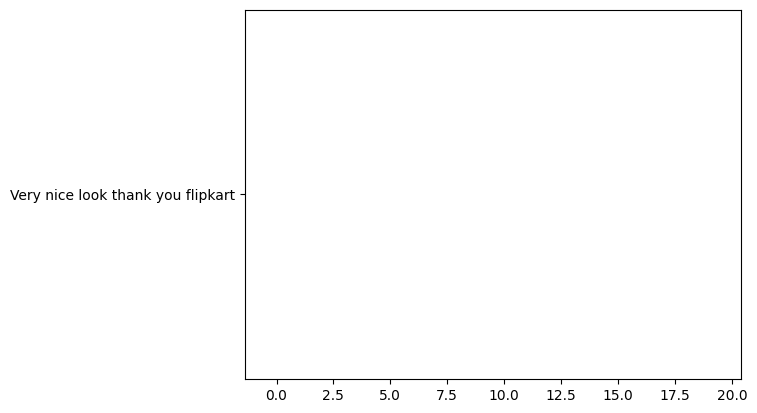

In [75]:
plt.bar(np.arange(20), df['review'].tolist()[1])

## (4) (10 points) Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [27]:
# Write your code here

%%capture
!pip install bertopic

In [28]:
from bertopic import BERTopic

topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(df['review'].tolist())

Batches:   0%|          | 0/11 [00:00<?, ?it/s]

2023-04-03 01:38:51,790 - BERTopic - Transformed documents to Embeddings
2023-04-03 01:39:01,779 - BERTopic - Reduced dimensionality
2023-04-03 01:39:01,814 - BERTopic - Clustered reduced embeddings


In [29]:
freq = topic_model.get_topic_info(); freq.head(5)

,Topic,Count,Name
0,-1,39,-1_super_quality_it_rate
1,0,99,0_watch_is_and_the
2,1,74,1_product_and_very_this
3,2,45,2_product_nice_good_very
4,3,25,3_worthy_superb_good_awesome


In [30]:
topic_model.get_topic(-1)  # Select the most frequent topic

[('super', 0.1241522502030272),
 ('quality', 0.09215846388789743),
 ('it', 0.08821405063932834),
 ('rate', 0.08471199885202904),
 ('great', 0.08183829606046213),
 ('dial', 0.0675602464436278),
 ('stopwatch', 0.06721488186796126),
 ('wacth', 0.06721488186796126),
 ('good', 0.0655690936231688),
 ('buy', 0.06432306710011668)]

In [32]:
topic_model.visualize_term_rank()

In [33]:
topic_model.update_topics(df['review'].tolist(), topics, n_gram_range=(1, 2))
topic_model.visualize_term_rank()

In [35]:
# reducing number of topics:
topic_model.reduce_topics(df['review'].tolist(), nr_topics=60)

2023-04-03 01:43:52,377 - BERTopic - Reduced number of topics from 9 to 9


In [36]:
print(topic_model.topics_)

[5, 1, -1, 0, 1, 6, 0, 1, 4, 0, 1, 1, 1, 0, 1, 0, 1, 1, 4, 3, 1, 5, 6, 2, 0, 0, 1, 1, 0, 1, 1, 0, 1, 6, 0, 3, 1, 0, 1, 0, 1, 1, 0, 1, 4, 0, 7, 2, 1, 1, 3, 1, -1, -1, 1, 1, 3, 5, 1, 4, 1, -1, -1, 2, 4, 2, 3, 4, 6, 2, 2, -1, 5, 7, 6, 1, 0, 2, -1, 0, 0, 2, 4, -1, 5, 6, 0, 4, 4, 0, -1, 2, 0, -1, 5, -1, 1, 3, -1, 0, -1, 6, 2, -1, 1, 0, 2, 2, 2, 2, 3, 5, 2, 0, 0, 3, 0, 7, 1, 2, 2, 2, -1, 4, -1, 0, 1, 4, 3, 0, 1, 4, 4, 4, 0, 0, 0, 0, 1, 1, 1, 0, 2, 3, 2, 6, 0, 0, 7, 6, 0, 3, -1, 7, 2, 0, 0, 2, 5, 2, 7, 0, 7, -1, 1, 1, 1, 0, 0, 0, 3, 4, 2, 2, 2, -1, -1, 5, 0, 2, -1, -1, 1, 0, 0, 2, 4, -1, 1, 4, 3, 1, -1, -1, 1, 0, -1, 0, -1, 5, 2, 1, 7, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 7, 2, 2, 5, 1, 0, 2, 0, 0, 0, 1, 4, -1, 1, -1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 3, -1, 3, 3, 3, 0, 1, 0, 0, 0, 1, 0, 1, 5, 1, -1, 3, -1, 7, 2, 6, 0, 2, 1, -1, 1, 2, 0, 1, 2, 0, 3, 0, 3, 2, 6, 0, 1, 0, 2, 1, 1, 0, 0, 1, 2, 5, 6, 2, -1, 0, 0, 0, 0, 1, 0, 0, 3, 6, 0, 3, 6, 1, -1, 7, 0, 0, 0, 0, 7, 2, 1, 0, 5, 0, 1, 3, 4, 5, 0, 2

In [40]:
# searching the topic :

similar_topics, similarity = topic_model.find_topics("Watch", top_n=5); similar_topics

[6, 0, -1, 1, 3]

In [41]:
topic_model.get_topic(6)

[('good watch', 0.2808483521734563),
 ('watch', 0.2559812290343944),
 ('nice watch', 0.1861484832516431),
 ('good', 0.17076042869171448),
 ('watch nice', 0.15200047314019835),
 ('really good', 0.14599394797070991),
 ('is really', 0.14109069797508986),
 ('watch it', 0.14109069797508986),
 ('watch very', 0.13336416035488355),
 ('very', 0.12042159940712674)]

## (5) (10 extra points) Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.

In [78]:
# Write your answer here (no code needed for this question)

'''
Topic modeling automatically extracts topics from text documents. different techniques used are LSA, LDA, PLSA, Bert Model, LDA2Vec. 
LSA: Latent semantic analysis, In this, topics are modeled over matrix decomposition(dimensional reduction) and are described by loadings over terms. 
Sometimes its loadings can be negative and harder to interpret. corpus and dictionary are main inputs.
LDA: Latent Dirichlet allocation, the words that are mentioned in document are likely to belong among same topic along with other words of documents
The main part is, it can deal with ambigous words in a smooth way.
The reviews of the product for top and last are nearly identical for all three.Because it has the capability to breakdown the original matrix 
document using an information retrieval approach while maintaining essential subjects, LDA produces superior results than LDA and BERT. As we can 
see, the optimal coherence score of the LDA is 0.44 and LSA is 0.41, in which LDA got superior score compared to LSA. BERT model is used to search
for the similar kind of topics in the document by calculating the probabilities.  We can visualize the different topics using pyLDAvis tool, 
which helps to display various topics according to documents.
After analysing and comparing the results, LDA model performed better compared to others.
'''

'\nTopic modeling automatically extracts topics from text documents. different techniques used are LSA, LDA, PLSA, Bert Model, LDA2Vec. \nLSA: Latent semantic analysis, In this, topics are modeled over matrix decomposition(dimensional reduction) and are described by loadings over terms. \nSometimes its loadings can be negative and harder to interpret. corpus and dictionary are main inputs.\nLDA: Latent Dirichlet allocation, the words that are mentioned in document are likely to belong among same topic along with other words of documents\nThe main part is, it can deal with ambigous words in a smooth way.\nThe reviews of the product for top and last are nearly identical for all three.Because it has the capability to breakdown the original matrix \ndocument using an information retrieval approach while maintaining essential subjects, LDA produces superior results than LDA and BERT. As we can \nsee, the optimal coherence score of the LDA is 0.44 and LSA is 0.41, in which LDA got superior s